In [1]:
# %load_ext autoreload
# %autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import pandas as pd
from train_simulator import Operator, Controller, Train, Kalman

### Create run curve

In [2]:
%%time
operator = Operator(dt=1, L=10000)
run_curve = operator.shortest_path()
print len(run_curve)

205
CPU times: user 209 ms, sys: 14.4 ms, total: 224 ms
Wall time: 248 ms


### Controller adustment

In [3]:
controller = Controller()
controller.set_params([1, 0, 0])
controller.set_run_curve(run_curve)
train, err = controller.run()
print train.t
print err

210.8
0.873161069413


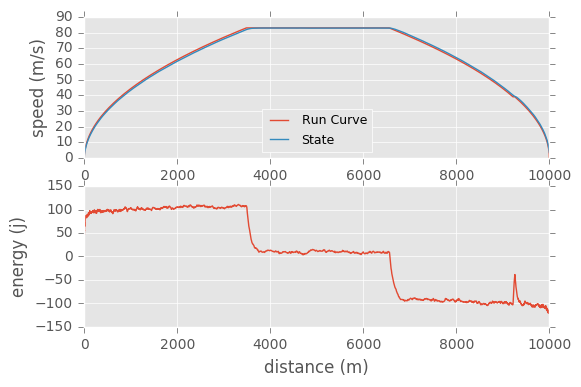

In [4]:
rc = np.array([[r, v] for r, v in run_curve]).T
x = np.array(train.x).T

plt.subplot(211)
plt.plot(rc[0], rc[1], label='Run Curve')
plt.plot(x[0], x[1], label='State')
plt.legend(loc='best', fontsize=9)
plt.xlim([0, 1e4])
plt.ylabel('speed (m/s)')

plt.subplot(212)
plt.plot(x[0,1:], train.energy)
plt.xlim([0, 1e4]);
plt.ylabel('energy (j)')
plt.xlabel('distance (m)');

In [5]:
print controller.param_search()
train, err = controller.run()
print train.t
print err

[ 7.03885971  0.04790359  3.83577915]
203.5
0.00474651171508


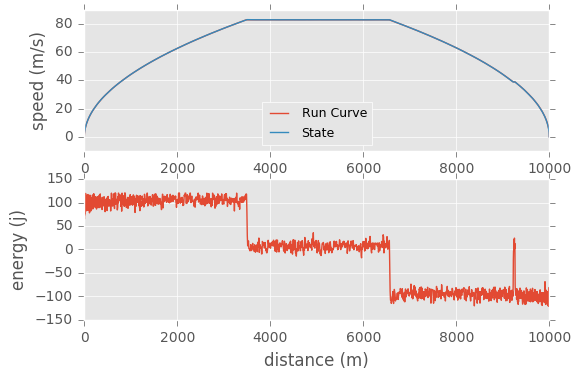

In [6]:
x = np.array(train.x).T

plt.subplot(211)
plt.plot(rc[0], rc[1], label='Run Curve')
plt.plot(x[0], x[1], label='State')
plt.legend(loc='best', fontsize=9)
plt.xlim([0, 1e4])
plt.ylabel('speed (m/s)')

plt.subplot(212)
plt.plot(x[0,1:], train.energy)
plt.xlim([0, 1e4]);
plt.ylabel('energy (j)')
plt.xlabel('distance (m)');

### Put it all together

In [7]:
sig_d = 0.1
sig_s = 3.0
n = 3
x0 = np.zeros(2)
P0 = np.diag([1, 0.01])

train = Train(drive_noise=sig_d, sensor_noise=sig_s, num_sensor=n)
kalman = Kalman(x0, P0, drive_noise=sig_d, sensor_noise=sig_s, num_sensor=n)
train, err = controller.run(train=train, filter=kalman)
print train.t
print err

204.9
0.00687751611309


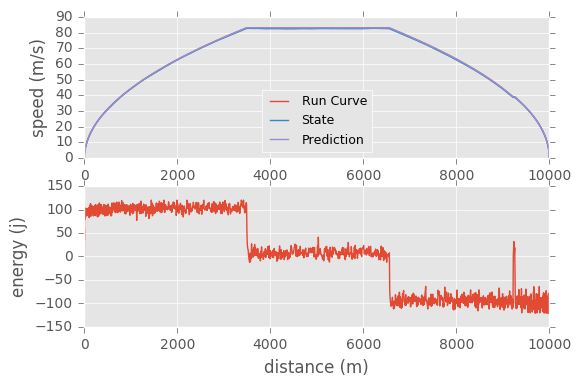

In [8]:
x = np.array(train.x).T
x_ = np.array(kalman.x).T

plt.subplot(211)
plt.plot(rc[0], rc[1], label='Run Curve')
plt.plot(x[0], x[1], label='State')
plt.plot(x_[0], x_[1], label='Prediction');
plt.legend(loc='best', fontsize=9)
plt.xlim([0, 1e4])
plt.ylabel('speed (m/s)')

plt.subplot(212)
plt.plot(x[0,1:], train.energy)
plt.xlim([0, 1e4]);
plt.ylabel('energy (j)')
plt.xlabel('distance (m)');